In [588]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R

In [589]:
def calculate_m(min_frequenz_array):
    m_array = []
    for i in range(0,len(min_frequenz_array)-1):
        m_array.append(min_frequenz_array[i]/(min_frequenz_array[i+1]-min_frequenz_array[i]))
    return m_array

In [590]:
def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

In [591]:
data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv")
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
frequenz

array([1.19835259e+13, 1.19979813e+13, 1.20124367e+13, ...,
       2.39786160e+14, 2.39800616e+14, 2.39815071e+14])

In [592]:
wavelength = scipy.constants.c/frequenz
wavelength

array([2.50170494e-05, 2.49869084e-05, 2.49568399e-05, ...,
       1.25024921e-06, 1.25017385e-06, 1.25009849e-06])

In [593]:
def sine(f,A):
    return A*np.sin(2*np.pi*f)

In [594]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

In [595]:
def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]


In [596]:
cutdown = find_nearest(frequenz, 0.9e14)
cutup = find_nearest(frequenz, 1.6e14)
frequenz_s = frequenz[cutdown:cutup]

## Calculation for J14028 at room temperature (20deg)

In [597]:
room_smooth, room_smoothed_out = flatten(data[11][::-1][cutdown:cutup], N = 1000)

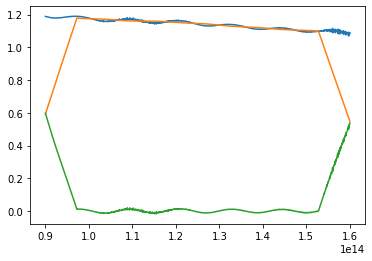

In [598]:
plt.plot(frequenz_s,data[11][::-1][cutdown:cutup])
plt.plot(frequenz_s,room_smooth)
plt.plot(frequenz_s,room_smoothed_out)

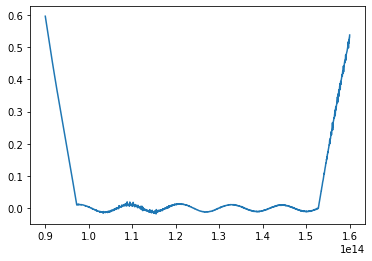

In [599]:
plt.plot(frequenz_s,room_smoothed_out)

In [600]:
minima_index_calc_room = scipy.signal.argrelmin(room_smoothed_out, order = 500)
minima_frequenz_room = []
minima_absorption_room = []
for minimum in minima_index_calc_room[0]:
    minima_frequenz_room.append(frequenz_s[minimum])
    minima_absorption_room.append(room_smoothed_out[minimum])
m_array_room = calculate_m(minima_frequenz_room)
m_array_room = m_array_room
minima_frequenz_room = minima_frequenz_room
minima_absorption_room = minima_absorption_room
m_array_room

[8.475682082499548, 10.124207839998222, 10.523980839666178, 12.337612296752692]

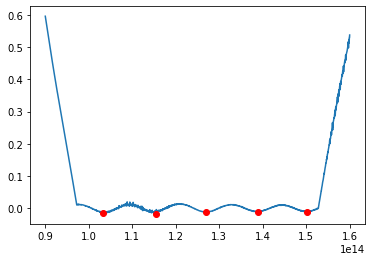

In [601]:
plt.plot(frequenz_s,room_smoothed_out)
plt.plot(minima_frequenz_room,minima_absorption_room,'ro')

In [602]:
m_array_room_clean = np.arange(9,14,1) 
m_array_room_clean

array([ 9, 10, 11, 12, 13])

In [603]:
def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

In [604]:
n_array_minima_room = []
for i in range(len(m_array_room_clean)):
    n_array_minima_room.append(refractive_index(m_array_room_clean[i],4.6e-6,minima_frequenz_room[i]))
n_array_minima_room

[2.839507795783752,
 2.822050186326788,
 2.8252011590796515,
 2.8145920577611983,
 2.820529157970119]

In [605]:
n_array_minima_room

[2.839507795783752,
 2.822050186326788,
 2.8252011590796515,
 2.8145920577611983,
 2.820529157970119]

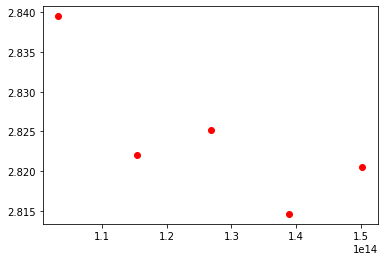

In [606]:
plt.plot(minima_frequenz_room,n_array_minima_room,'ro')

In [607]:
params_J14, cov = scipy.optimize.curve_fit(polynomial, minima_frequenz_room, n_array_minima_room)

c:\Users\da1qu1r1\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


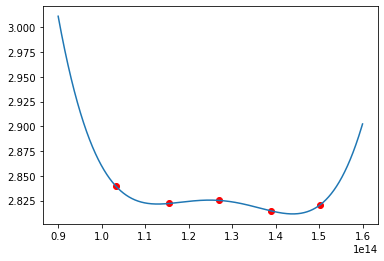

In [608]:
plt.plot(minima_frequenz_room, n_array_minima_room,'ro')
plt.plot(frequenz_s, polynomial(np.array(frequenz_s), *params_J14))

In [609]:
def optdick_total(f):
    return 4.6e-6 * polynomial(np.array(f), *params_J14)

In [610]:
params_STINS = np.array([ 1.70027006e+00, -6.30953690e-15,  1.57510852e-28, -9.13871783e-43,
        1.69927520e-57])

In [611]:
def optdick_STINS(f): 
    return 3.5e-6 * polynomial(np.array(f), *params_STINS)

In [612]:
def optdick_toppart(f):
    return optdick_total(f) - optdick_STINS(f)

In [613]:
def dispersion_toppart(f):
    return optdick_toppart(f) / 1.1e-6

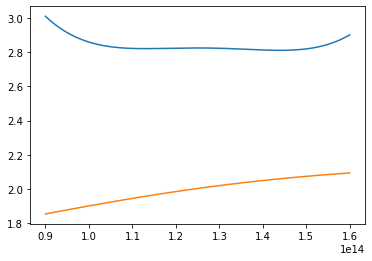

In [614]:
plt.plot(frequenz_s,polynomial(np.array(frequenz_s), *params_J14))
plt.plot(frequenz_s,polynomial(np.array(frequenz_s), *params_STINS))

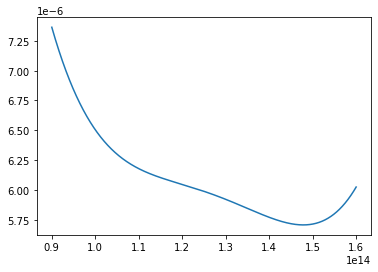

In [615]:
plt.plot(frequenz_s, optdick_toppart(frequenz_s))

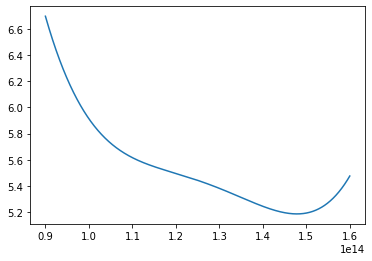

In [616]:
plt.plot(frequenz_s, dispersion_toppart(frequenz_s))

In [617]:
L_array = []
for i in range(len(n_array_minima_room)):
    L_array.append(länge(m_array_room_clean[i],polynomial(minima_frequenz_room[i],*params_J14),minima_frequenz_room[i]))

In [618]:
L_array

[4.5999999999999585e-06,
 4.600000000000018e-06,
 4.6000000000000305e-06,
 4.600000000000027e-06,
 4.5999999999998924e-06]

### Berechnen der Länge bei 90C

In [619]:
for i in range(len(n_array_minima_room)):
    print(n_array_minima_room[i]-polynomial(minima_frequenz_room[i], *params_J14))

-2.5757174171303632e-14
1.1102230246251565e-14
1.865174681370263e-14
1.6431300764452317e-14
-6.616929226765933e-14


In [620]:
data90 = data[12]

In [621]:
cutdown = find_nearest(frequenz, 1.2e14)
cutup = find_nearest(frequenz, 1.55e14)
frequenz_s_cut = frequenz[cutdown:cutup]

In [622]:
smooth90,smoothed_out90 = flatten(data90[::-1],cutdown = cutdown, cutup= cutup, N = 1000)

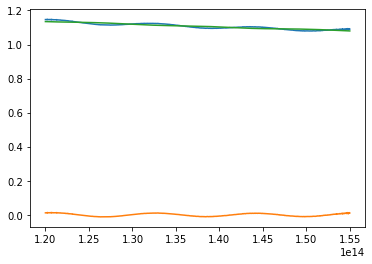

In [623]:
plt.plot(frequenz_s_cut,data90[::-1][cutdown:cutup])
plt.plot(frequenz_s_cut,smoothed_out90)
plt.plot(frequenz_s_cut,smooth90)

In [624]:
minimum_index_90 = scipy.signal.argrelmin(smoothed_out90, order = 500)
minima_frequenz_90 = []
minma_absorption_90 = []
m_array_90 = []
for minimum in minimum_index_90[0]:
    minima_frequenz_90.append(frequenz_s_cut[minimum])
    minma_absorption_90.append(smoothed_out90[minimum])
m_array_90 = calculate_m(minima_frequenz_90)
m_array_90

[10.911691557797592, 12.518954222368773]

In [625]:
minima_frequenz_90[0] = 1.268e14

In [626]:
minima_frequenz_90[2] = 1.498e14

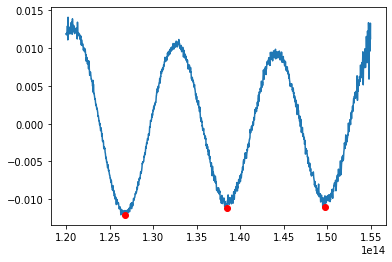

In [627]:
plt.plot(frequenz_s_cut,smoothed_out90)
plt.plot(minima_frequenz_90,minma_absorption_90,'ro')

In [628]:
m_array_90_clean = np.arange(11,14,1)

In [629]:
len(m_array_90_clean) == len(minima_frequenz_90)

True

In [630]:
n_array_minima_90 = []
for i in range(len(minima_frequenz_90)):
    n_array_minima_90.append(polynomial(minima_frequenz_90[i], *params_J14))
n_array_minima_90

[2.8252210945101837, 2.8151074162784013, 2.819288358306963]

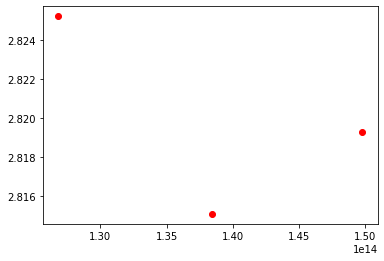

In [631]:
plt.plot(minima_frequenz_90,n_array_minima_90,'ro')

In [632]:
L_array_90 = []
for i in range(len(n_array_minima_90)):
    L_array_90.append(länge(m_array_90_clean[i],n_array_minima_90[i],minima_frequenz_90[i]))

##### Length for 90C

In [633]:
L_array_90

[4.602689717172777e-06, 4.615485685879405e-06, 4.614054799672985e-06]

### For -160C

In [634]:
data_160 = data[13]

In [635]:
cutdown = find_nearest(frequenz, 1.2e14)
cutup = find_nearest(frequenz, 1.55e14)
frequenz_s_cut = frequenz[cutdown:cutup]

In [636]:
smooth160,smoothed_out160 = flatten(data_160[::-1],cutdown = cutdown,cutup = cutup, N = 1400)

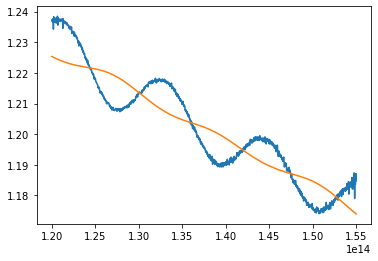

In [637]:
plt.plot(frequenz_s_cut,data_160[::-1][cutdown:cutup])
plt.plot(frequenz_s_cut,smooth160)

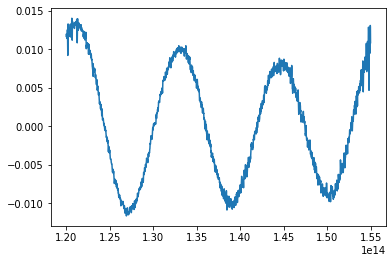

In [638]:
plt.plot(frequenz_s_cut,smoothed_out160)

In [639]:
minimum_index_160 = scipy.signal.argrelmin(smoothed_out160, order = 500)
minima_frequenz_160 = []
minma_absorption_160 = []
m_array_160 = []
for minimum in minimum_index_160[0]:
    minima_frequenz_160.append(frequenz_s_cut[minimum])
    minma_absorption_160.append(smoothed_out160[minimum])
m_array_160 = calculate_m(minima_frequenz_160)
m_array_160

[10.974999990278516, 11.626213585720892]

In [640]:
m_array_160_clean = np.arange(11,14,1)
m_array_160_clean   

array([11, 12, 13])

In [641]:
minima_frequenz_160[0] = 1.271e14

In [642]:

minima_frequenz_160[1] = 1.39e14

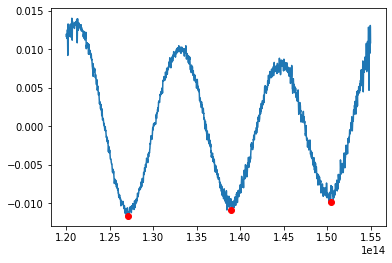

In [643]:
plt.plot(frequenz_s_cut,smoothed_out160)
plt.plot(minima_frequenz_160,minma_absorption_160,'ro')

In [644]:
n_array_minima_160 = []
for i in range(len(minima_frequenz_160)):
    n_array_minima_160.append(polynomial(minima_frequenz_160[i], *params_J14))
n_array_minima_160

[2.8251367698732963, 2.8145212339923233, 2.821215129045953]

In [645]:
L_array_160 = []
for i in range(len(n_array_minima_160)):
    L_array_160.append(länge(m_array_160_clean[i],n_array_minima_160[i],minima_frequenz_160[i]))

##### Length for -160C

In [646]:
L_array_160

[4.5919628328041605e-06, 4.597826971065967e-06, 4.592693100123368e-06]

#### Summary

In [647]:
print(minima_frequenz_room)
print(m_array_room_clean)

[103283826544742.78, 115469727990716.27, 126875037898966.48, 138930840720343.62, 150191596641236.9]
[ 9 10 11 12 13]


In [648]:
print(minima_frequenz_90)
print(m_array_90_clean)

[126800000000000.0, 138439357157334.2, 149800000000000.0]
[11 12 13]


In [649]:
print(minima_frequenz_160)
print(m_array_160_clean)

[127100000000000.0, 139000000000000.0, 150393972229532.44]
[11 12 13]
